In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
sns.set_style("darkgrid")

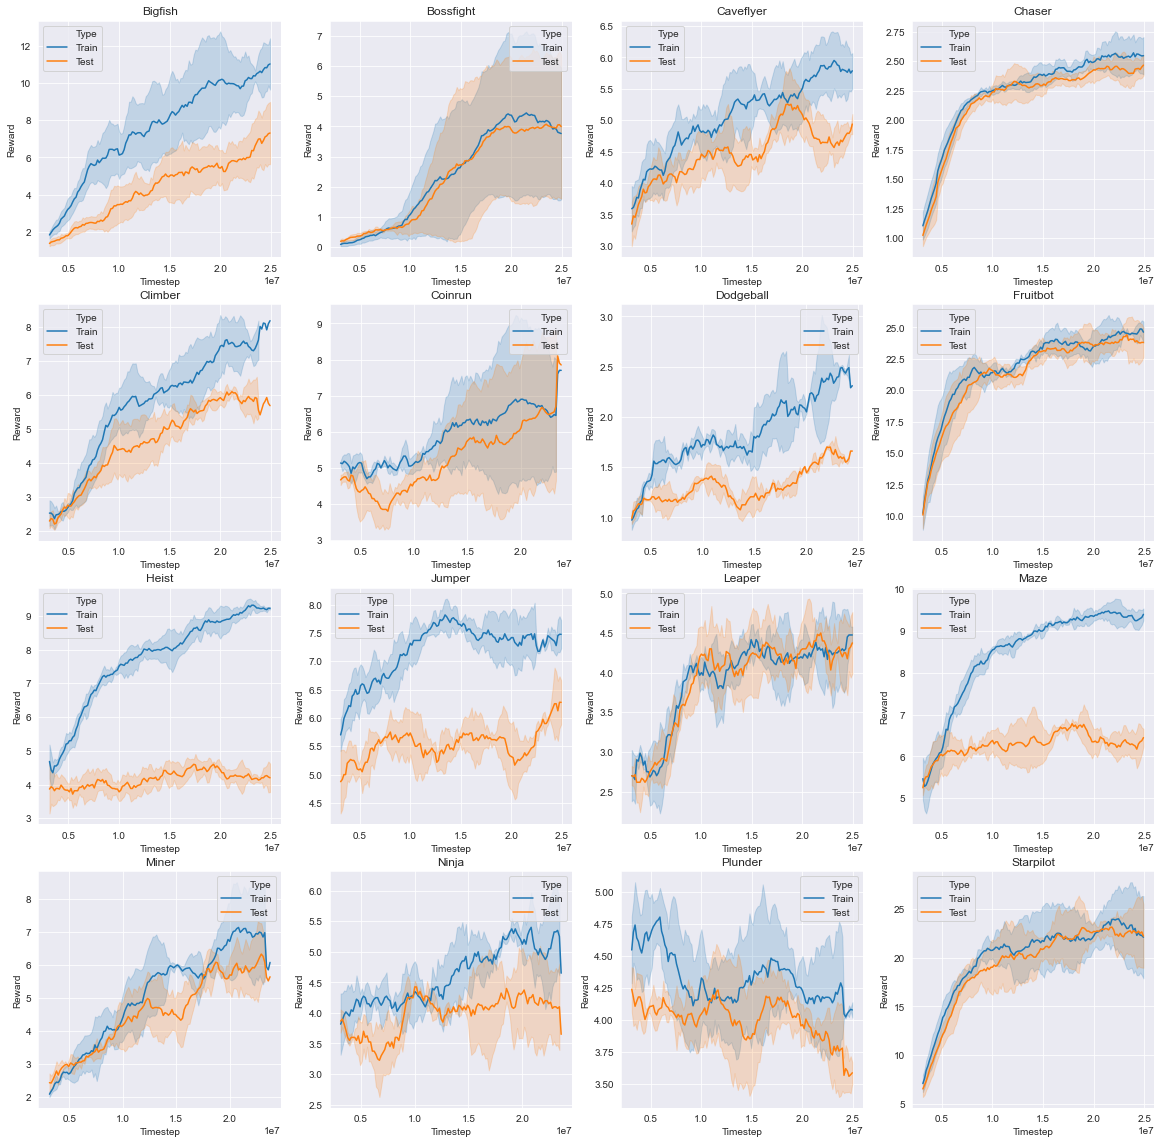

In [9]:
env_names = ["bigfish", "bossfight", "caveflyer", "chaser", "climber", "coinrun", "dodgeball", 
             "fruitbot", "heist", "jumper", "leaper", "maze", "miner", "ninja", "plunder", "starpilot"]
num_wide = int(np.sqrt(len(env_names)))
fig, axes = plt.subplots(nrows=num_wide, ncols=num_wide, figsize=(20, 20))
for i_env, env_name in enumerate(env_names):
    file_naming_scheme="modelbased_logs/" + env_name + "/" + env_name + "-*-16/progress-drac-" + env_name + "-reproduce-s1.csv"
    big_df = pd.DataFrame()
    ax = axes[i_env // num_wide, i_env % num_wide]
#     ax = axes
    for file_name in glob(file_naming_scheme):
        try:
            df = pd.read_csv(file_name)
            df = df[["train/mean_episode_reward", "test/mean_episode_reward", "train/total_num_steps"]]
            df.columns = ["Train", "Test", "Timestep"]
            df.loc[:, df.columns != "Timestep"] = df.loc[:, df.columns != "Timestep"].rolling(window=20).mean()
            df = pd.melt(df, id_vars=['Timestep'], var_name="Type", value_name="Reward")
            big_df = big_df.append(df, ignore_index=True)
        except Exception as e:
            print(e)
    sns.lineplot(data=big_df, x="Timestep", y="Reward", hue="Type", ci='sd', ax=ax)
    ax.set_title(env_name.title())

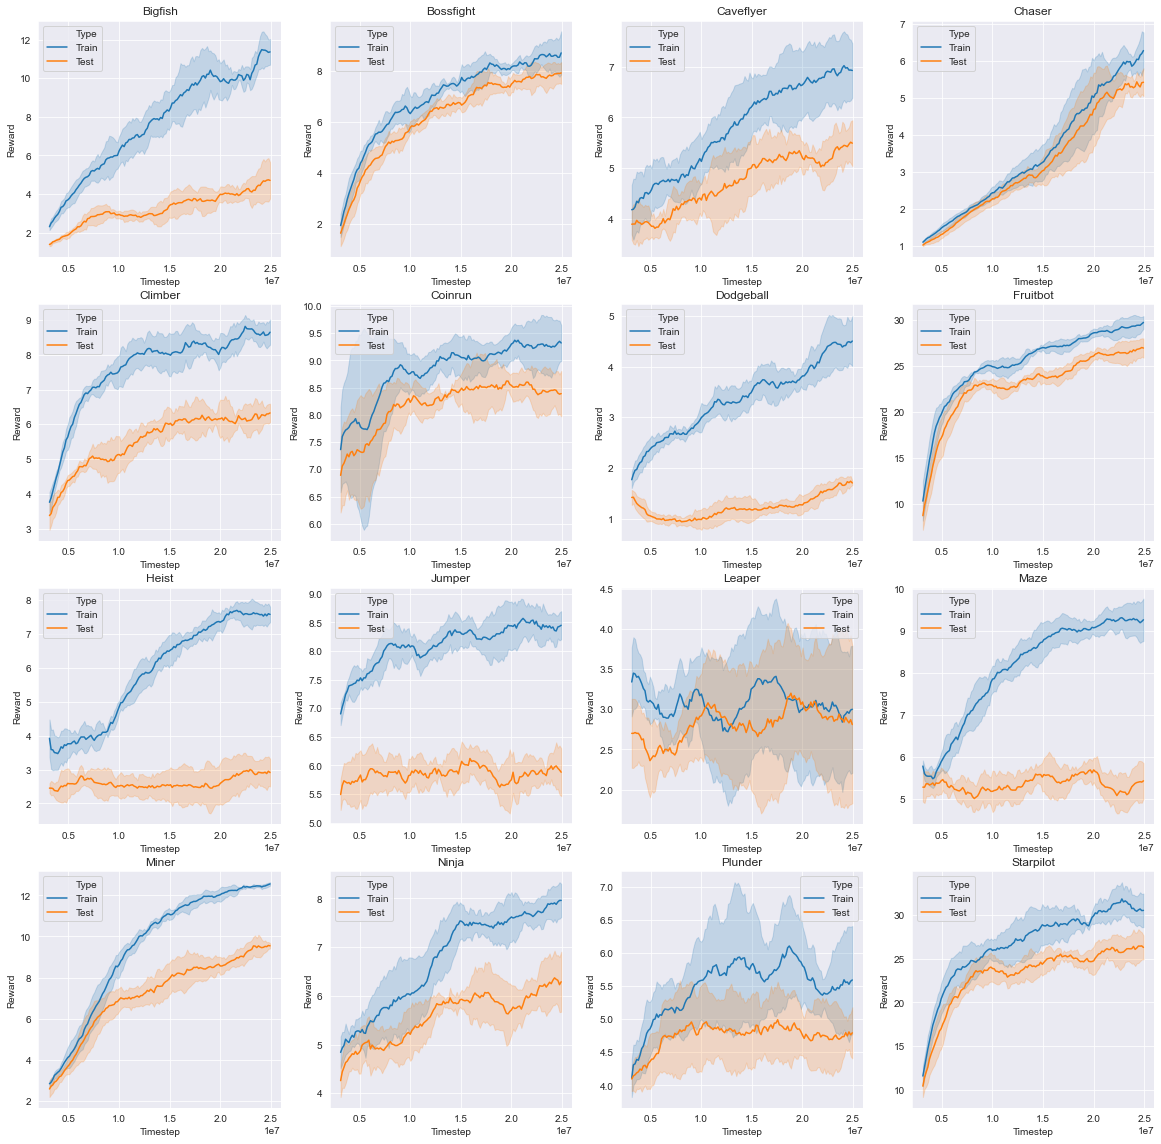

In [5]:
env_names = ["bigfish", "bossfight", "caveflyer", "chaser", "climber", "coinrun", "dodgeball", 
             "fruitbot", "heist", "jumper", "leaper", "maze", "miner", "ninja", "plunder", "starpilot"]
num_wide = int(np.sqrt(len(env_names)))
fig, axes = plt.subplots(nrows=num_wide, ncols=num_wide, figsize=(20, 20))
for i_env, env_name in enumerate(env_names):
    file_naming_scheme="original_ppo_logs/" + env_name + "/" + env_name + "-*/progress-drac-" + env_name + "-reproduce-s1.csv"
    big_df = pd.DataFrame()
    ax = axes[i_env // num_wide, i_env % num_wide]
#     ax = axes
    for file_name in glob(file_naming_scheme):
        df = pd.read_csv(file_name)
        df = df[["train/mean_episode_reward", "test/mean_episode_reward", "train/total_num_steps"]]
        df.columns = ["Train", "Test", "Timestep"]
        df.loc[:, df.columns != "Timestep"] = df.loc[:, df.columns != "Timestep"].rolling(window=20).mean()
        df = pd.melt(df, id_vars=['Timestep'], var_name="Type", value_name="Reward")
        big_df = big_df.append(df, ignore_index=True)
    sns.lineplot(data=big_df, x="Timestep", y="Reward", hue="Type", ci='sd', ax=ax)
    ax.set_title(env_name.title())